# Predicting Housing Data
This notebook explores the housing dataset and makes all the necessary transformations to it prior to training a model.

## Import Libraries

In [2]:
# DML
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
from matplotlib import pyplot as plt

# ML
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

## Load data

In [3]:
# Raw data
df_train = pd.read_csv('../../data/raw/train.csv')
df_test = pd.read_csv('../../data/raw/test.csv')

# Summaries
print('Shape of training dataset:', df_train.shape)
print('Duplicated rows:', df_train.duplicated().sum())

Shape of training dataset: (1460, 81)
Duplicated rows: 0


## EDA

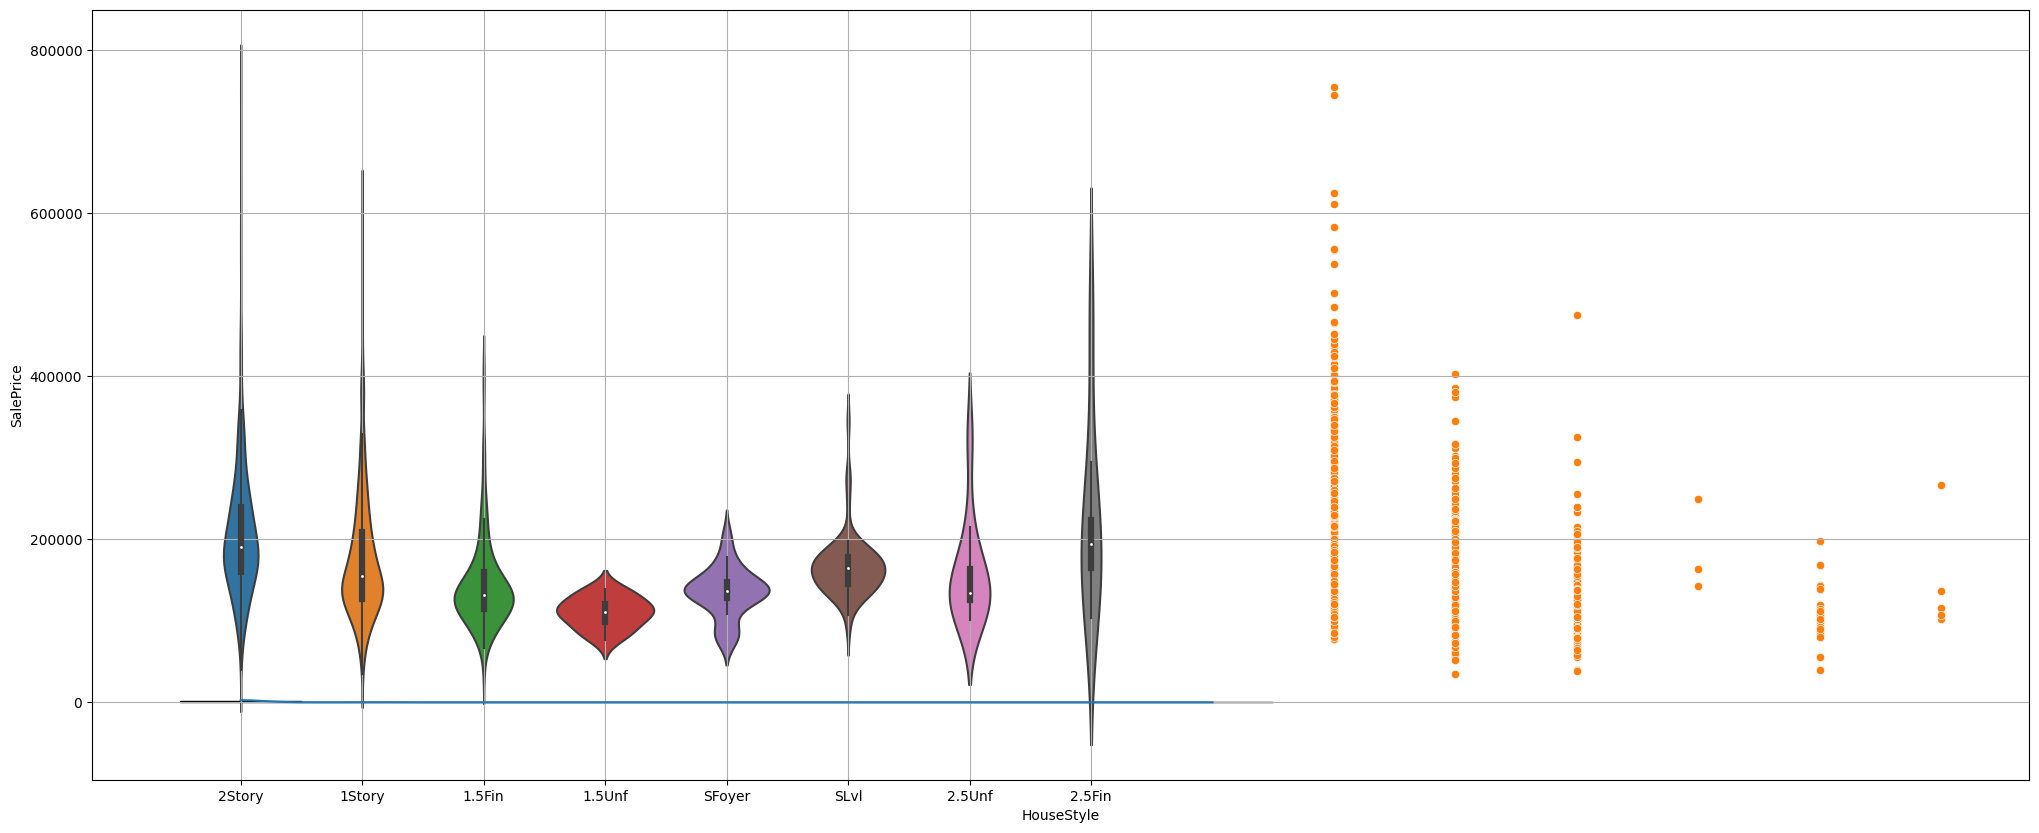

In [4]:
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(x=train_data['SaleCondition'])
sns.histplot(x=train_data['SaleType'], kde=True, ax=ax)
sns.violinplot(x=train_data['HouseStyle'], y=train_data['SalePrice'],ax=ax)
sns.scatterplot(x=train_data["Foundation"], y=train_data["SalePrice"], palette='deep', ax=ax)
plt.grid()

## Fill missing data

In [5]:
train_data['FireplaceQu'].fillna("No", inplace=True)
train_data['BsmtQual'].fillna("No", inplace=True)
train_data['BsmtCond'].fillna("No", inplace=True)
train_data['BsmtFinType1'].fillna("No", inplace=True)
train_data['BsmtFinType2'].fillna("No", inplace=True)
train_data['BsmtFinType2'].fillna("None", inplace=True)

def fill_all_missing_values(data):
    for col in data.columns:
        if((data[col].dtype == 'float64') or (data[col].dtype == 'int64')):
            data[col].fillna(data[col].mean(), inplace=True)
        else:
             data[col].fillna(data[col].mode()[0], inplace=True)


fill_all_missing_values(train_data)
fill_all_missing_values(test_data)

## Drop unwanted data

In [6]:
drop_col = ['Id', 'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'MoSold', 'YrSold', 'MSSubClass',
            'GarageType', 'GarageArea', 'GarageYrBlt', 'GarageFinish', 'YearRemodAdd', 'LandSlope',
            'BsmtUnfSF', 'BsmtExposure', '2ndFlrSF', 'LowQualFinSF', 'Condition1', 'Condition2', 'Heating',
             'Exterior1st', 'Exterior2nd', 'HouseStyle', 'LotShape', 'LandContour', 'LotConfig', 'Functional',
             'BsmtFinSF1', 'BsmtFinSF2', 'FireplaceQu', 'WoodDeckSF', 'GarageQual', 'GarageCond', 'OverallCond'
           ]

train_data.drop(drop_col, axis=1, inplace=True)
test_data.drop(drop_col, axis=1, inplace=True)

## Preprocessing

In [7]:
ordinal_col = ['GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'ExterQual', 'ExterCond', 'KitchenQual', 'FireplaceQu',
               'PavedDrive', 'Functional', 'Electrical', 'Heating', 'BsmtFinType1', 'BsmtFinType2', 'Utilities']

OE = OrdinalEncoder(categories=[['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
train_data['BsmtQual'] = OE.fit_transform(train_data[['BsmtQual']])
test_data['BsmtQual'] = OE.transform(test_data[['BsmtQual']])


OE = OrdinalEncoder(categories=[['No', 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
train_data['BsmtCond'] = OE.fit_transform(train_data[['BsmtCond']])
test_data['BsmtCond'] = OE.transform(test_data[['BsmtCond']])


OE = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']])
train_data['ExterQual'] = OE.fit_transform(train_data[['ExterQual']])
test_data['ExterQual'] = OE.transform(test_data[['ExterQual']])


OE = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']])
train_data['ExterCond'] = OE.fit_transform(train_data[['ExterCond']])
test_data['ExterCond'] = OE.transform(test_data[['ExterCond']])


OE = OrdinalEncoder(categories=[['Po', 'Fa', 'TA', 'Gd', 'Ex']])
train_data['KitchenQual'] = OE.fit_transform(train_data[['KitchenQual']])
test_data['KitchenQual'] = OE.transform(test_data[['KitchenQual']])
OE = OrdinalEncoder(categories=[['N', 'P', 'Y']])
train_data['PavedDrive'] = OE.fit_transform(train_data[['PavedDrive']])
test_data['PavedDrive'] = OE.transform(test_data[['PavedDrive']])


OE = OrdinalEncoder(categories=[['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr']])
train_data['Electrical'] = OE.fit_transform(train_data[['Electrical']])
test_data['Electrical'] = OE.transform(test_data[['Electrical']])

OE = OrdinalEncoder(categories=[['No', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']])
train_data['BsmtFinType1'] = OE.fit_transform(train_data[['BsmtFinType1']])
test_data['BsmtFinType1'] = OE.transform(test_data[['BsmtFinType1']])
OE = OrdinalEncoder(categories=[['No', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']])
train_data['BsmtFinType2'] = OE.fit_transform(train_data[['BsmtFinType2']])
test_data['BsmtFinType2'] = OE.transform(test_data[['BsmtFinType2']])


OE = OrdinalEncoder(categories=[['ELO', 'NoSeWa', 'NoSewr', 'AllPub']])
train_data['Utilities'] = OE.fit_transform(train_data[['Utilities']])
test_data['Utilities'] = OE.transform(test_data[['Utilities']])

OE = OrdinalEncoder(categories=[['C (all)', 'RH', 'RM', 'RL', 'FV']])
train_data['MSZoning'] = OE.fit_transform(train_data[['MSZoning']])
test_data['MSZoning'] = OE.transform(test_data[['MSZoning']])

OE = OrdinalEncoder(categories=[['Slab', 'BrkTil', 'Stone', 'CBlock', 'Wood', 'PConc']])
train_data['Foundation'] = OE.fit_transform(train_data[['Foundation']])
test_data['Foundation'] = OE.transform(test_data[['Foundation']])

OE = OrdinalEncoder(categories=[['MeadowV', 'IDOTRR', 'BrDale', 'Edwards', 'BrkSide', 'OldTown', 'NAmes', 'Sawyer', 'Mitchel', 'NPkVill', 'SWISU', 'Blueste', 'SawyerW', 'NWAmes', 'Gilbert', 'Blmngtn', 'ClearCr', 'Crawfor', 'CollgCr', 'Veenker', 'Timber', 'Somerst', 'NoRidge', 'StoneBr', 'NridgHt']])
train_data['Neighborhood'] = OE.fit_transform(train_data[['Neighborhood']])
test_data['Neighborhood'] = OE.transform(test_data[['Neighborhood']])

OE = OrdinalEncoder(categories=[['None', 'BrkCmn', 'BrkFace', 'Stone']])
train_data['MasVnrType'] = OE.fit_transform(train_data[['MasVnrType']])
test_data['MasVnrType'] = OE.transform(test_data[['MasVnrType']])
OE = OrdinalEncoder(categories=[['AdjLand', 'Abnorml','Alloca', 'Family', 'Normal', 'Partial']])
train_data['SaleCondition'] = OE.fit_transform(train_data[['SaleCondition']])
test_data['SaleCondition'] = OE.transform(test_data[['SaleCondition']])

OE = OrdinalEncoder(categories=[['Gambrel', 'Gable','Hip', 'Mansard', 'Flat', 'Shed']])
train_data['RoofStyle'] = OE.fit_transform(train_data[['RoofStyle']])
test_data['RoofStyle'] = OE.transform(test_data[['RoofStyle']])

OE = OrdinalEncoder(categories=[['ClyTile', 'CompShg', 'Roll','Metal', 'Tar&Grv','Membran', 'WdShake', 'WdShngl']])
train_data['RoofMatl'] = OE.fit_transform(train_data[['RoofMatl']])
test_data['RoofMatl'] = OE.transform(test_data[['RoofMatl']])

In [8]:
Level_col = ['Street' ,'BldgType', 'SaleType', 'CentralAir']

encoder = LabelEncoder()
def encode_catagorical_columns(train, test):
    for col in Level_col:
        train[col] = encoder.fit_transform(train[col])
        test[col]  = encoder.transform(test[col])
encode_catagorical_columns(train_data, test_data)

In [9]:
train_data['BsmtRating'] = train_data['BsmtCond'] * train_data['BsmtQual']
train_data['ExterRating'] = train_data['ExterCond'] * train_data['ExterQual']
train_data['BsmtFinTypeRating'] = train_data['BsmtFinType1'] * train_data['BsmtFinType2']

train_data['BsmtBath'] = train_data['BsmtFullBath'] + train_data['BsmtHalfBath']
train_data['Bath'] = train_data['FullBath'] + train_data['HalfBath']
train_data['PorchArea'] = train_data['OpenPorchSF'] + train_data['EnclosedPorch'] + train_data['3SsnPorch'] + train_data['ScreenPorch']

test_data['BsmtRating'] = test_data['BsmtCond'] * test_data['BsmtQual']
test_data['ExterRating'] = test_data['ExterCond'] * test_data['ExterQual']
test_data['BsmtFinTypeRating'] = test_data['BsmtFinType1'] * test_data['BsmtFinType2']

test_data['BsmtBath'] = test_data['BsmtFullBath'] + test_data['BsmtHalfBath']
test_data['Bath'] = test_data['FullBath'] + test_data['HalfBath']
test_data['PorchArea'] = test_data['OpenPorchSF'] + test_data['EnclosedPorch'] + test_data['3SsnPorch'] + test_data['ScreenPorch']

In [10]:
drop_col = ['OverallQual', 
            'ExterCond', 'ExterQual',
            'BsmtCond', 'BsmtQual',
            'BsmtFinType1', 'BsmtFinType2',
            'HeatingQC',
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
            'BsmtFullBath', 'BsmtHalfBath',
            'FullBath', 'HalfBath',
           ]

train_data.drop(drop_col, axis=1, inplace=True)
test_data.drop(drop_col, axis=1, inplace=True)

print(train_data.shape)

(1460, 36)


## Model

In [11]:
y = train_data['SalePrice']
X = train_data.drop(['SalePrice'], axis=1)

candidate_max_leaf_nodes = [250]
#model = LinearRegression()

for node in candidate_max_leaf_nodes:
    model = RandomForestRegressor(max_leaf_nodes=node,)
    model.fit(X, y)
    score = cross_val_score(model, X, y, cv=10)
    print(score.mean())

0.8661892532822071


## Final output

In [12]:
price = model.predict(test_data)
submission = pd.DataFrame({
    "Id": test_ids,
    "SalePrice": price
})

submission.to_csv("submission.csv", index=False)
submission.sample(10)

,Id,SalePrice
235,1696,262940.088334
656,2117,136923.287832
915,2376,291544.106125
865,2326,165213.987670
192,1653,93957.583477
384,1845,143574.120708
1145,2606,142574.644531
770,2231,230220.845666
553,2014,199537.347495
957,2418,130254.170713


In [1]:
print("end")

end
